Theoretical

Q1 What is K-Nearest Neighbors (KNN) and how does it work

K-Nearest Neighbors (KNN) is a supervised learning algorithm used for both classification and regression. It is a lazy learning algorithm that does not explicitly train a model but instead stores the entire dataset and makes predictions based on similarity

How KNN Works:

Choose K: The number of nearest neighbors to consider.

Compute Distance: Calculate the distance between the new data point and all points in the dataset

(e.g., Euclidean, Manhattan distance).

Find the K Nearest Neighbors: Select the K closest data points.

Make Prediction:

Classification: Majority vote (most common class among K neighbors).

Regression: Average of K neighbors' values.

Q2 What is the difference between KNN Classification and KNN Regression

KNN Classification: The predicted label is determined by the majority vote of the K nearest neighbors.

KNN Regression: The predicted value is computed as the average (or weighted average) of the K nearest neighbors' values.

Q3 What is the role of the distance metric in KNN

The distance metric determines how "close" two data points are. Common metrics:

Euclidean Distance (Most common): Measures straight-line distance.

Manhattan Distance: Measures distance along axes (city block distance).

Minkowski Distance: Generalized form of Euclidean and Manhattan.

Hamming Distance: Used for categorical data.

Q4 What is the Curse of Dimensionality in KNN

As the number of features (dimensions) increases, the distance between all points becomes similar, making it hard to differentiate between nearest neighbors. This degrades KNN's performance.

Solutions:

Feature Selection (removing irrelevant features).

Dimensionality Reduction (using PCA).

Use distance-based weighting instead of a fixed K value

Q5 How can we choose the best value of K in KNN

Low K (e.g., K=1, K=3) → More sensitive to noise, risk of overfitting.

High K (e.g., K=50, K=100) → Smoother decision boundary, risk of underfitting.

Methods to choose K:

Cross-validation: Try different values and pick the one with the best accuracy.

Elbow method: Plot accuracy vs. K and look for the point where accuracy stops improving significantly.

Odd values for classification (to avoid ties in binary classification).

Q6 What are KD Tree and Ball Tree in KNN

These are data structures used to speed up KNN when searching for nearest neighbors:

KD Tree (K-Dimensional Tree): Best for low-dimensional data, organizes points into a tree structure.

Ball Tree: Better for high-dimensional data, groups points into hyperspheres.

Q7 When should you use KD Tree vs. Ball Tree

KD Tree: Efficient when dimensions < 20.

Ball Tree: Works better for higher dimensions (>20).

Brute Force Search: Used when dimensions are too high for both.

Q8 What are the disadvantages of KNN

Computationally expensive for large datasets (storing and searching all data).

Sensitive to irrelevant features (distance calculation affected).

Performance drops with high-dimensional data.

Requires feature scaling for accurate results.

Q9 How does feature scaling affect KNN

Since KNN relies on distance calculations, features with larger ranges can dominate the distance metric.

Solution: Normalize or standardize data:

Min-Max Scaling: Scales values between [0,1].

Standardization: Centers data around mean 0 and standard deviation 1.

Q10 What is PCA (Principal Component Analysis)

PCA is a dimensionality reduction technique that transforms high-dimensional data into fewer dimensions while retaining maximum variance.

Q11 How does PCA work

Standardize the Data (mean = 0, variance = 1).

Compute the Covariance Matrix to find relationships between features.

Find Eigenvalues & Eigenvectors to determine new axes (principal components).

Sort Eigenvalues (largest ones capture most variance).

Transform Data using top principal components.

Q12 What is the geometric intuition behind PCA

PCA finds the directions (principal components) along which the data varies the most and projects it onto those directions. The first component captures the most variance, the second captures the second most, and so on.

Q13 What is the difference between Feature Selection and Feature Extraction

Feature Selection: Selecting a subset of original features (e.g., removing redundant variables).

Feature Extraction: Creating new features from the existing ones (e.g., PCA generates new uncorrelated features).

Q14 What are Eigenvalues and Eigenvectors in PCA

Eigenvectors define the directions of principal components.

Eigenvalues represent the amount of variance captured by each component.

Q15 How do you decide the number of components to keep in PCA

Explained Variance Ratio: Keep components that capture at least 95% of the variance.

Scree Plot: Look for the "elbow" point where adding more components gives little improvement.

Q16 Can PCA be used for classification

PCA itself does not classify, but it can reduce dimensionality before classification (e.g., KNN, SVM). It helps remove noise and improve efficiency.

Q17 What are the limitations of PCA

Assumes linear relationships (not always valid).

Hard to interpret transformed features.

Sensitive to outliers.

Q18 How do KNN and PCA complement each other

PCA reduces dimensionality, making KNN faster and less affected by the Curse of Dimensionality.

KNN still needs scaling, but PCA helps by creating uncorrelated features.

PCA + KNN works well when features are correlated and high-dimensional.

Q19 How does KNN handle missing values in a dataset

KNN can impute missing values by:

Replacing missing values with the average of K nearest neighbors.

Using distance-weighted imputation (closer neighbors have more influence)


Q20 What are the key differences between PCA and Linear Discriminant Analysis (LDA)

Feature	PCA	LDA
Goal	Maximize variance	Maximize class separation
Supervised?	No	Yes
Work with?	Any dataset	Only labeled dataset
Output	New uncorrelated features	Linear combination of original features
PCA → Best for reducing dimensionality in any dataset.

LDA → Best for classification when class labels are available.

Q21 Train a KNN Classifier on the Iris dataset and print model accuracy

In [1]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling (Important for distance-based algorithms like KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train KNN Classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make Predictions
y_pred = knn.predict(X_test)

# Evaluate Model Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Classifier Accuracy: {accuracy:.4f}")

KNN Classifier Accuracy: 0.9333



Q22 Train a KNN Regressor on a synthetic dataset and evaluate using Mean Squared Error (MSE)

KNN Regressor MSE: 0.2483


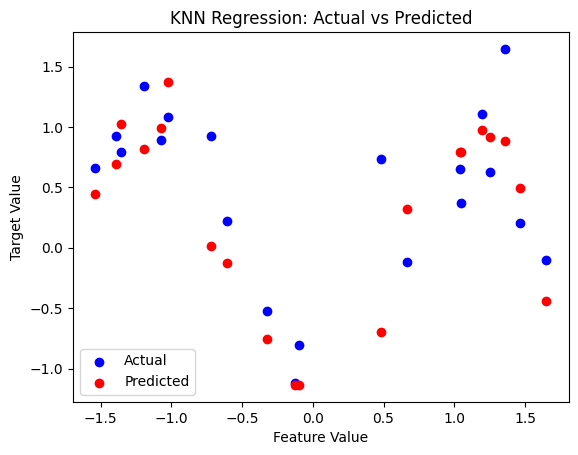

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Generate synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Features (100 samples, 1 feature)
y = np.sin(X).ravel() + np.random.normal(scale=0.5, size=100)  # Target with noise

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (Important for distance-based algorithms like KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train KNN Regressor with k=5
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

# Make Predictions
y_pred = knn_reg.predict(X_test)

# Evaluate Model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"KNN Regressor MSE: {mse:.4f}")

# Plot actual vs predicted values
plt.scatter(X_test, y_test, color='blue', label="Actual")
plt.scatter(X_test, y_pred, color='red', label="Predicted")
plt.xlabel("Feature Value")
plt.ylabel("Target Value")
plt.title("KNN Regression: Actual vs Predicted")
plt.legend()
plt.show()

Q23 Train a KNN Classifier using different distance metrics (Euclidean and Manhattan) and compare accuracy

KNN Classifier Accuracy (Euclidean): 0.9333
KNN Classifier Accuracy (Manhattan): 0.9333


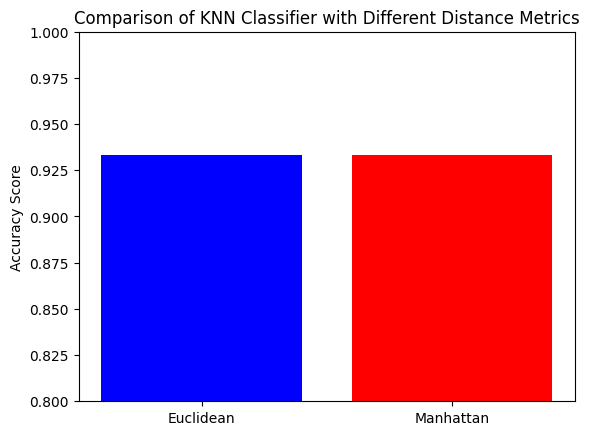

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling (Important for distance-based algorithms like KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train KNN Classifier with Euclidean distance (default)
knn_euclidean = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train, y_train)

# Train KNN Classifier with Manhattan distance
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train, y_train)

# Make Predictions
y_pred_euclidean = knn_euclidean.predict(X_test)
y_pred_manhattan = knn_manhattan.predict(X_test)

# Evaluate Model using Accuracy Score
accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)
accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)

print(f"KNN Classifier Accuracy (Euclidean): {accuracy_euclidean:.4f}")
print(f"KNN Classifier Accuracy (Manhattan): {accuracy_manhattan:.4f}")

# Bar Plot to Compare Accuracies
plt.bar(["Euclidean", "Manhattan"], [accuracy_euclidean, accuracy_manhattan], color=['blue', 'red'])
plt.ylabel("Accuracy Score")
plt.title("Comparison of KNN Classifier with Different Distance Metrics")
plt.ylim(0.8, 1)  # Adjust y-axis for better visualization
plt.show()

Q24 Train a KNN Classifier with different values of K and visualize decision boundaried

K=1 -> Training Accuracy: 1.0000, Test Accuracy: 0.9000


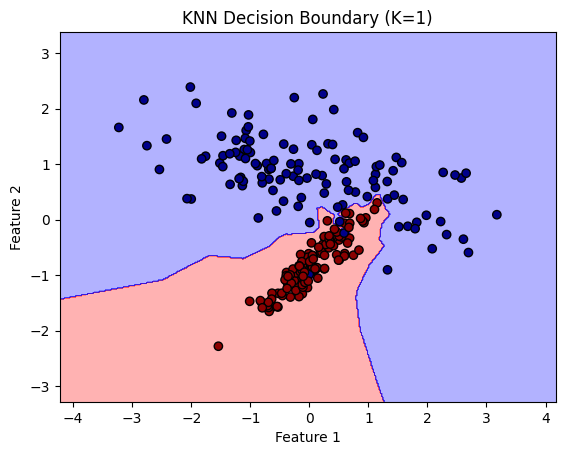

K=3 -> Training Accuracy: 0.9792, Test Accuracy: 0.9500


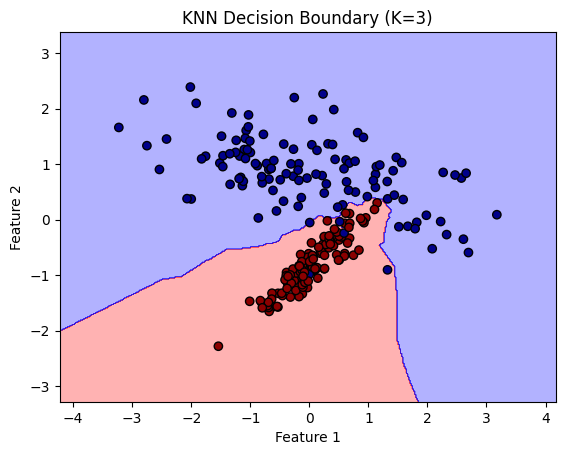

K=5 -> Training Accuracy: 0.9667, Test Accuracy: 0.9500


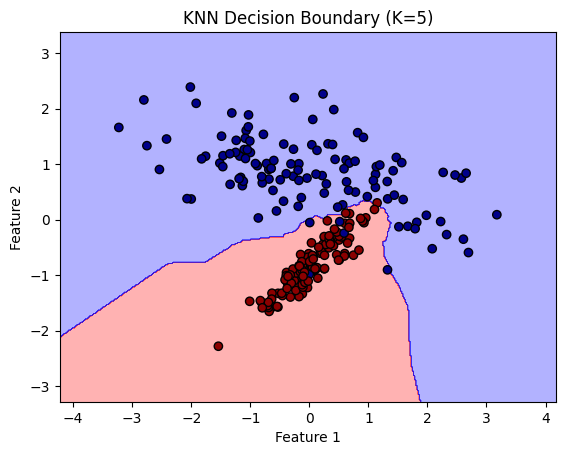

K=10 -> Training Accuracy: 0.9708, Test Accuracy: 0.9333


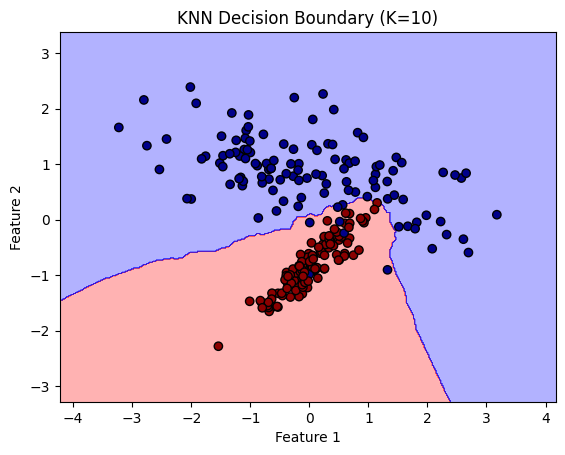

In [4]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

# Generate a synthetic dataset
X, y = make_classification(n_samples=300, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the dataset (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function to plot decision boundaries
def plot_decision_boundary(X, y, model, title):
    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict on grid points
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot contour and dataset points
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(["red", "blue"]))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap=ListedColormap(["darkred", "darkblue"]))
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Train and visualize KNN for different values of K
k_values = [1, 3, 5, 10]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    print(f"K={k} -> Training Accuracy: {knn.score(X_train, y_train):.4f}, Test Accuracy: {knn.score(X_test, y_test):.4f}")
    plot_decision_boundary(X_train, y_train, knn, title=f"KNN Decision Boundary (K={k})")

Q25 Apply Feature Scaling before training a KNN model and compare results with unscaled data

In [5]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Generate a synthetic dataset
X, y = make_classification(n_samples=500, n_features=5, n_classes=2, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train KNN on Unscaled Data
knn_unscaled = KNeighborsClassifier(n_neighbors=5)
knn_unscaled.fit(X_train, y_train)
y_pred_unscaled = knn_unscaled.predict(X_test)
accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)

# Apply Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN on Scaled Data
knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

# Print accuracy results
print(f"KNN Accuracy on Unscaled Data: {accuracy_unscaled:.4f}")
print(f"KNN Accuracy on Scaled Data: {accuracy_scaled:.4f}")

KNN Accuracy on Unscaled Data: 0.9200
KNN Accuracy on Scaled Data: 0.9300


Q26 Train a PCA model on synthetic data and print the explained variance ratio for each component

Principal Component 1: 0.2437
Principal Component 2: 0.1628
Principal Component 3: 0.1166
Principal Component 4: 0.1093
Principal Component 5: 0.1012
Principal Component 6: 0.0943
Principal Component 7: 0.0937
Principal Component 8: 0.0784
Principal Component 9: 0.0000
Principal Component 10: 0.0000


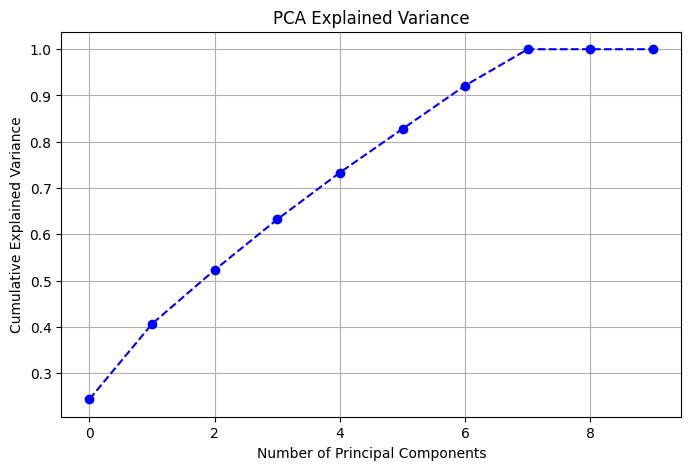

In [6]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

# Generate synthetic data
X, y = make_classification(n_samples=500, n_features=10, random_state=42)

# Apply Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train PCA Model
pca = PCA(n_components=10)  # Keep all components initially
X_pca = pca.fit_transform(X_scaled)

# Print explained variance ratio for each component
explained_variance = pca.explained_variance_ratio_
for i, var in enumerate(explained_variance):
    print(f"Principal Component {i+1}: {var:.4f}")

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--', color='b')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.grid()
plt.show()

Q27 Apply PCA before training a KNN Classifier and compare accuracy with and without PCA

KNN Accuracy without PCA: 0.9333
KNN Accuracy with PCA: 0.9000


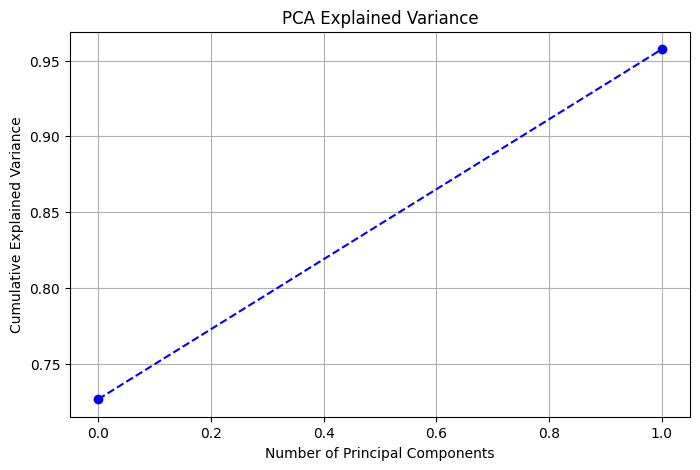

In [7]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN Classifier WITHOUT PCA
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
accuracy_without_pca = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy without PCA: {accuracy_without_pca:.4f}")

# Apply PCA (Reduce to 2 Principal Components)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train KNN Classifier WITH PCA
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
accuracy_with_pca = accuracy_score(y_test, y_pred_pca)
print(f"KNN Accuracy with PCA: {accuracy_with_pca:.4f}")

# Plot explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.grid()
plt.show()

Q28 Perform Hyperparameter Tuning on a KNN Classifier using GridSearchCV

In [9]:
# Import necessary libraries
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define KNN Classifier
knn = KNeighborsClassifier()

# Define hyperparameters to tune
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Different values of K
    'weights': ['uniform', 'distance'],  # Weighting methods
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Different distance metrics
}

# Perform GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Print best parameters and best accuracy
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_:.4f}")

# Train the best model on the full training data
best_knn = grid_search.best_estimator_
best_knn.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = best_knn.predict(X_test_scaled)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
Best Accuracy: 0.9667
Test Accuracy: 0.9333


Q29 Train a KNN Classifier and check the number of misclassified samples

In [10]:
# Import necessary libraries
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply Feature Scaling (optional but recommended)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define and train the KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')  # Using K=5
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn.predict(X_test_scaled)

# Calculate the number of misclassified samples
misclassified_samples = np.sum(y_test != y_pred)

# Print results
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Number of Misclassified Samples: {misclassified_samples}")

Model Accuracy: 0.9333
Number of Misclassified Samples: 2


Q30 Train a PCA model and visualize the cumulative explained variance

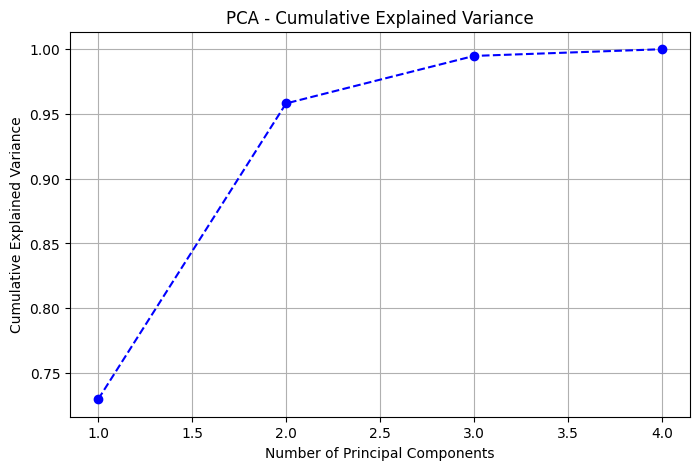

Principal Component 1: 0.7296 explained variance
Principal Component 2: 0.2285 explained variance
Principal Component 3: 0.0367 explained variance
Principal Component 4: 0.0052 explained variance


In [11]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load the dataset
iris = load_iris()
X = iris.data

# Apply Feature Scaling (PCA is affected by different feature scales)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train PCA model
pca = PCA(n_components=X.shape[1])  # Set components equal to the number of features
pca.fit(X_scaled)

# Get the explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot the cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, X.shape[1] + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Print explained variance for each component
for i, var in enumerate(explained_variance, start=1):
    print(f"Principal Component {i}: {var:.4f} explained variance")


Q31 Train a KNN Classifier using different values of the weights parameter (uniform vs. distance) and compare accuracy

Accuracy with Uniform Weights: 1.0000
Accuracy with Distance Weights: 1.0000


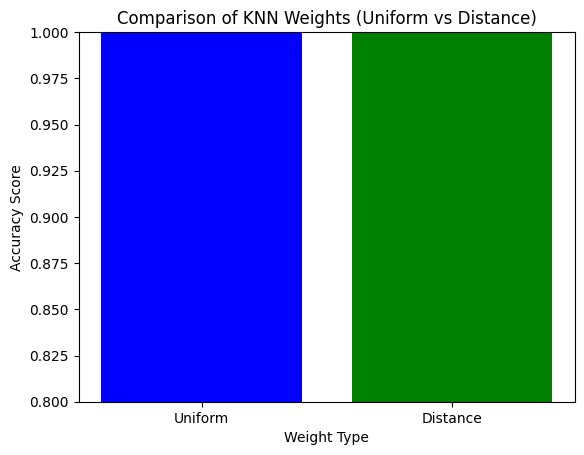

In [12]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train KNN with 'uniform' weights (all neighbors have equal weight)
knn_uniform = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn_uniform.fit(X_train, y_train)
y_pred_uniform = knn_uniform.predict(X_test)

# Train KNN with 'distance' weights (closer neighbors have more influence)
knn_distance = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_distance.fit(X_train, y_train)
y_pred_distance = knn_distance.predict(X_test)

# Calculate accuracy scores
accuracy_uniform = accuracy_score(y_test, y_pred_uniform)
accuracy_distance = accuracy_score(y_test, y_pred_distance)

# Print results
print(f"Accuracy with Uniform Weights: {accuracy_uniform:.4f}")
print(f"Accuracy with Distance Weights: {accuracy_distance:.4f}")

# Plot comparison
plt.bar(["Uniform", "Distance"], [accuracy_uniform, accuracy_distance], color=['blue', 'green'])
plt.xlabel("Weight Type")
plt.ylabel("Accuracy Score")
plt.title("Comparison of KNN Weights (Uniform vs Distance)")
plt.ylim(0.8, 1.0)  # Set y-axis limit for better visualization
plt.show()

Q32 Train a KNN Regressor and analyze the effect of different K values on performance

K = 1 -> MSE: 0.2521
K = 2 -> MSE: 0.1963
K = 3 -> MSE: 0.2273
K = 4 -> MSE: 0.2498
K = 5 -> MSE: 0.2483
K = 6 -> MSE: 0.2031
K = 7 -> MSE: 0.2128
K = 8 -> MSE: 0.2102
K = 9 -> MSE: 0.1998
K = 10 -> MSE: 0.2003
K = 11 -> MSE: 0.1933
K = 12 -> MSE: 0.2017
K = 13 -> MSE: 0.2049
K = 14 -> MSE: 0.2235
K = 15 -> MSE: 0.2336
K = 16 -> MSE: 0.2232
K = 17 -> MSE: 0.2155
K = 18 -> MSE: 0.2077
K = 19 -> MSE: 0.2148
K = 20 -> MSE: 0.2163


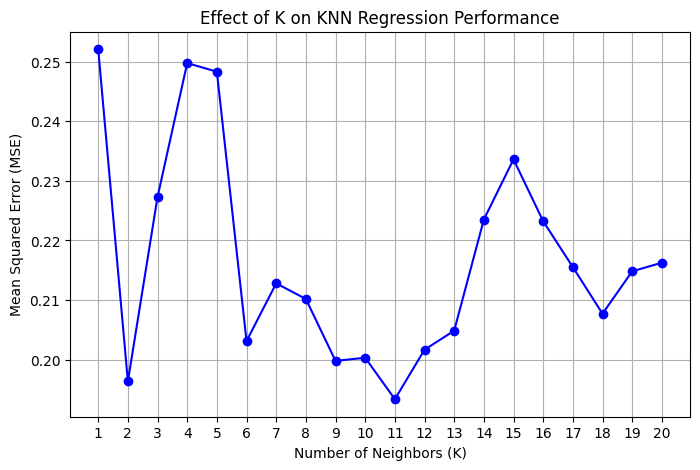

In [13]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Generate synthetic regression data
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Feature: Random values between 0 and 10
y = np.sin(X).ravel() + np.random.normal(0, 0.5, 100)  # Target with some noise

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluate KNN for different K values
k_values = range(1, 21)
mse_values = []

for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_train, y_train)
    y_pred = knn_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)
    print(f"K = {k} -> MSE: {mse:.4f}")

# Plot K vs MSE
plt.figure(figsize=(8, 5))
plt.plot(k_values, mse_values, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Effect of K on KNN Regression Performance")
plt.xticks(k_values)
plt.grid()
plt.show()

Q33 Implement KNN Imputation for handling missing values in a dataset

In [14]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer

# Create a sample dataset with missing values
data = {
    "Feature1": [1.0, 2.0, np.nan, 4.0, 5.0, np.nan, 7.0],
    "Feature2": [10.0, 20.0, 30.0, np.nan, 50.0, 60.0, np.nan],
    "Feature3": [100.0, 200.0, 300.0, 400.0, np.nan, np.nan, 700.0]
}

df = pd.DataFrame(data)
print("Original Dataset with Missing Values:\n", df)

# Apply KNN Imputation (K=3)
imputer = KNNImputer(n_neighbors=3)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

print("\nDataset after KNN Imputation:\n", df_imputed)

Original Dataset with Missing Values:
    Feature1  Feature2  Feature3
0       1.0      10.0     100.0
1       2.0      20.0     200.0
2       NaN      30.0     300.0
3       4.0       NaN     400.0
4       5.0      50.0       NaN
5       NaN      60.0       NaN
6       7.0       NaN     700.0

Dataset after KNN Imputation:
    Feature1   Feature2    Feature3
0  1.000000  10.000000  100.000000
1  2.000000  20.000000  200.000000
2  3.666667  30.000000  300.000000
3  4.000000  33.333333  400.000000
4  5.000000  50.000000  466.666667
5  2.666667  60.000000  200.000000
6  7.000000  33.333333  700.000000


Q34 Train a PCA model and visualize the data projection onto the first two principal components

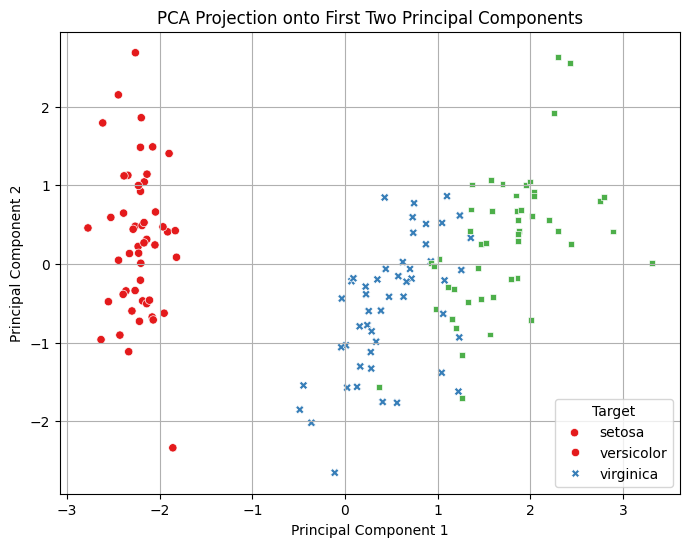

In [15]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (reduce to 2 components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="Set1", style=y, legend="full")

# Labels and title
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection onto First Two Principal Components")
plt.legend(title="Target", labels=target_names)
plt.grid(True)
plt.show()


Q35 Train a KNN Classifier using the KD Tree and Ball Tree algorithms and compare performance

In [16]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train KNN classifier using KD Tree
knn_kd = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree')
knn_kd.fit(X_train, y_train)
y_pred_kd = knn_kd.predict(X_test)
accuracy_kd = accuracy_score(y_test, y_pred_kd)

# Train KNN classifier using Ball Tree
knn_ball = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')
knn_ball.fit(X_train, y_train)
y_pred_ball = knn_ball.predict(X_test)
accuracy_ball = accuracy_score(y_test, y_pred_ball)

# Print accuracy results
print(f"Accuracy using KD Tree: {accuracy_kd:.4f}")
print(f"Accuracy using Ball Tree: {accuracy_ball:.4f}")

Accuracy using KD Tree: 1.0000
Accuracy using Ball Tree: 1.0000


Q36 Train a PCA model on a high-dimensional dataset and visualize the Scree plot

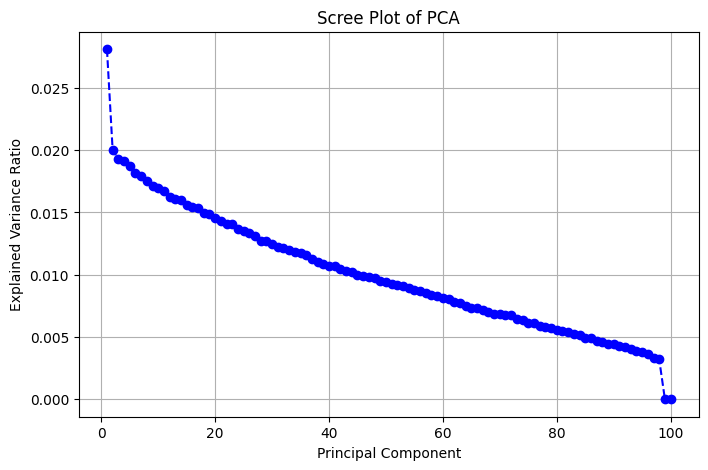

In [17]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

# Generate a high-dimensional dataset (100 features)
X, _ = make_classification(n_samples=500, n_features=100, random_state=42)

# Standardize the dataset (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Get explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot Scree Plot (Explained Variance vs. Principal Components)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot of PCA')
plt.grid(True)
plt.show()

Q37 Train a KNN Classifier and evaluate performance using Precision, Recall, and F1-Score

In [18]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train a KNN classifier (K=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate performance
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print results
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Print detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Q38 Train a PCA model and analyze the effect of different numbers of components on accuracy

In [19]:
 Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Standardize the data (PCA works better with scaled data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Try different numbers of principal components and analyze accuracy
components = [1, 2, 3, 4]  # Vary number of PCA components
accuracy_results = []

for n in components:
    # Apply PCA with n components
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train a KNN classifier (K=5)
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_pca, y_train)

    # Make predictions
    y_pred = knn.predict(X_test_pca)

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results.append(accuracy)
    print(f"Number of PCA Components: {n}, Accuracy: {accuracy:.4f}")

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(components, accuracy_results, marker='o', linestyle='-')
plt.xlabel("Number of Principal Components")
plt.ylabel("Accuracy")
plt.title("Effect of PCA on KNN Accuracy")
plt.grid()
plt.show()

SyntaxError: invalid syntax (<ipython-input-19-2aab8d881812>, line 1)

Q39 Train a KNN Classifier with different leaf_size values and compare accuracy

Leaf Size: 1, Accuracy: 0.9333
Leaf Size: 5, Accuracy: 0.9333
Leaf Size: 10, Accuracy: 0.9333
Leaf Size: 20, Accuracy: 0.9333
Leaf Size: 30, Accuracy: 0.9333
Leaf Size: 40, Accuracy: 0.9333
Leaf Size: 50, Accuracy: 0.9333


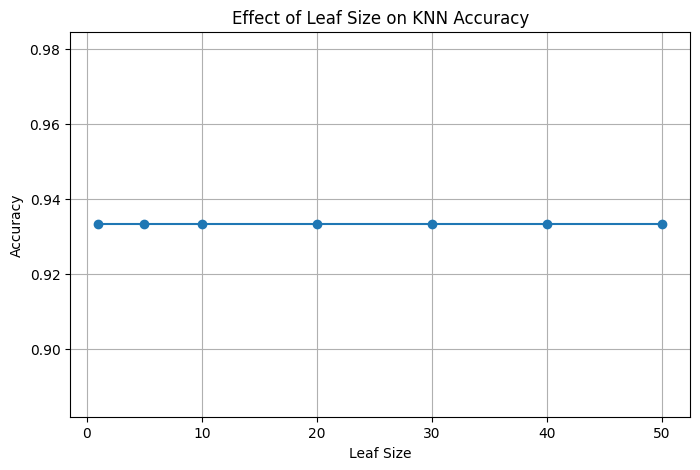

In [20]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Standardize the data (KNN is sensitive to scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Try different leaf_size values and analyze accuracy
leaf_sizes = [1, 5, 10, 20, 30, 40, 50]
accuracy_results = []

for leaf_size in leaf_sizes:
    # Train a KNN classifier (K=5, varying leaf_size)
    knn = KNeighborsClassifier(n_neighbors=5, leaf_size=leaf_size)
    knn.fit(X_train, y_train)

    # Make predictions
    y_pred = knn.predict(X_test)

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results.append(accuracy)
    print(f"Leaf Size: {leaf_size}, Accuracy: {accuracy:.4f}")

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(leaf_sizes, accuracy_results, marker='o', linestyle='-')
plt.xlabel("Leaf Size")
plt.ylabel("Accuracy")
plt.title("Effect of Leaf Size on KNN Accuracy")
plt.grid()
plt.show()

Q40 Train a PCA model and visualize how data points are transformed before and after PCA

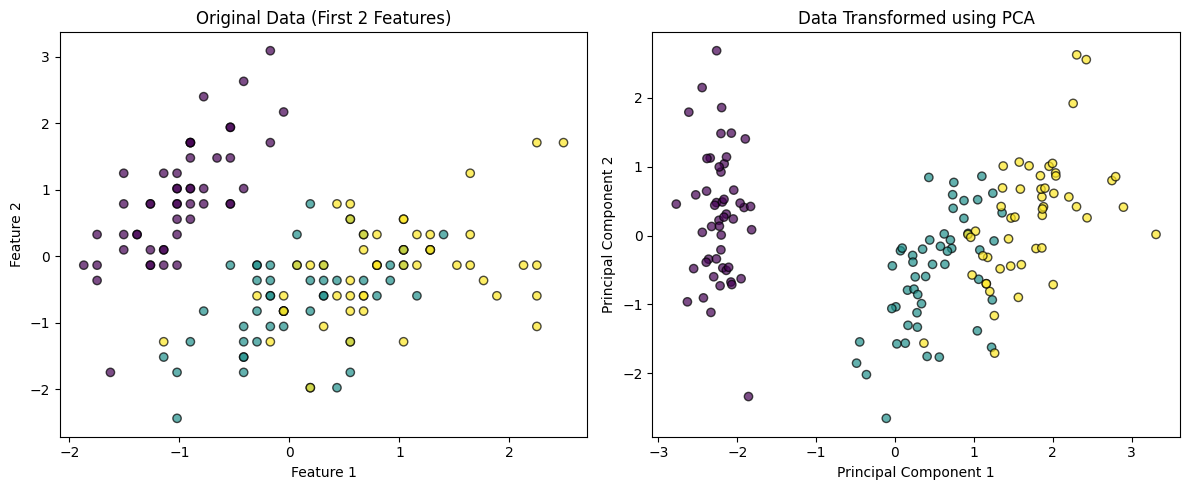

In [21]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Standardize the features (PCA requires scaled data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (reduce to 2 principal components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a figure with subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Original data visualization (before PCA) using first two features
ax[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis', edgecolor='k', alpha=0.7)
ax[0].set_title("Original Data (First 2 Features)")
ax[0].set_xlabel("Feature 1")
ax[0].set_ylabel("Feature 2")

# Transformed data visualization (after PCA)
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', alpha=0.7)
ax[1].set_title("Data Transformed using PCA")
ax[1].set_xlabel("Principal Component 1")
ax[1].set_ylabel("Principal Component 2")

plt.tight_layout()
plt.show()

Q41 Train a KNN Classifier on a real-world dataset (Wine dataset) and print classification report

In [22]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Load the Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features (KNN is sensitive to feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a KNN Classifier with K=5 (default choice)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = knn.predict(X_test_scaled)

# Print Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.93      0.96        14
           2       0.91      1.00      0.95        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



Q42 Train a KNN Regressor and analyze the effect of different distance metrics on prediction error

In [24]:
 Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Generate a synthetic regression dataset
X, y = make_regression(n_samples=500, n_features=5, noise=15, random_state=42)

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define different distance metrics
distance_metrics = ["euclidean", "manhattan", "minkowski"]

# Train KNN Regressor with different distance metrics and calculate MSE
mse_results = {}
for metric in distance_metrics:
    knn = KNeighborsRegressor(n_neighbors=5, metric=metric)
    knn.fit(X_train_scaled, y_train)

    # Predict on test data
    y_pred = knn.predict(X_test_scaled)

    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    mse_results[metric] = mse
    print(f"KNN Regressor with {metric} distance - MSE: {mse:.4f}")

# Plot MSE for different metrics
plt.figure(figsize=(8, 5))
plt.bar(mse_results.keys(), mse_results.values(), color=['blue', 'red', 'green'])
plt.xlabel("Distance Metric")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Effect of Distance Metrics on KNN Regression Performance")
plt.show()

SyntaxError: invalid syntax (<ipython-input-24-bcb4a1317ac5>, line 1)

Q43 Train a KNN Classifier and evaluate using ROC-AUC score

KNN Classifier ROC-AUC Score: 0.9820


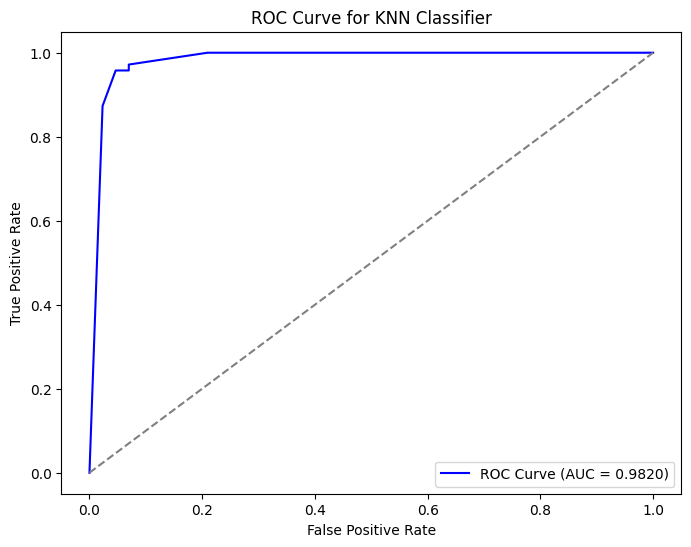

In [25]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target  # Features and target labels (binary classification)

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
knn.fit(X_train_scaled, y_train)

# Predict probabilities for the positive class (1)
y_probs = knn.predict_proba(X_test_scaled)[:, 1]

# Compute the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_probs)
print(f"KNN Classifier ROC-AUC Score: {roc_auc:.4f}")

# Plot the ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for KNN Classifier")
plt.legend()
plt.show()

Q44 Train a PCA model and visualize the variance captured by each principal component

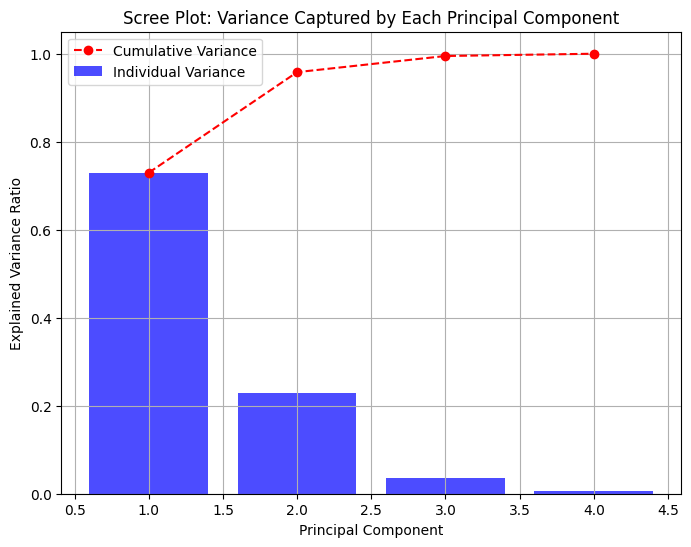

In [26]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Load the Iris dataset
data = load_iris()
X = data.data  # Features

# Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=X.shape[1])  # Keep all components
X_pca = pca.fit_transform(X_scaled)

# Get explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot Scree Plot (Explained Variance Ratio)
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color="blue", label="Individual Variance")
plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), marker="o", linestyle="--", color="red", label="Cumulative Variance")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot: Variance Captured by Each Principal Component")
plt.legend()
plt.grid()
plt.show()

Q45 Train a KNN Classifier and perform feature selection before training

KNN Accuracy Before Feature Selection: 0.9474
KNN Accuracy After Feature Selection: 0.9737


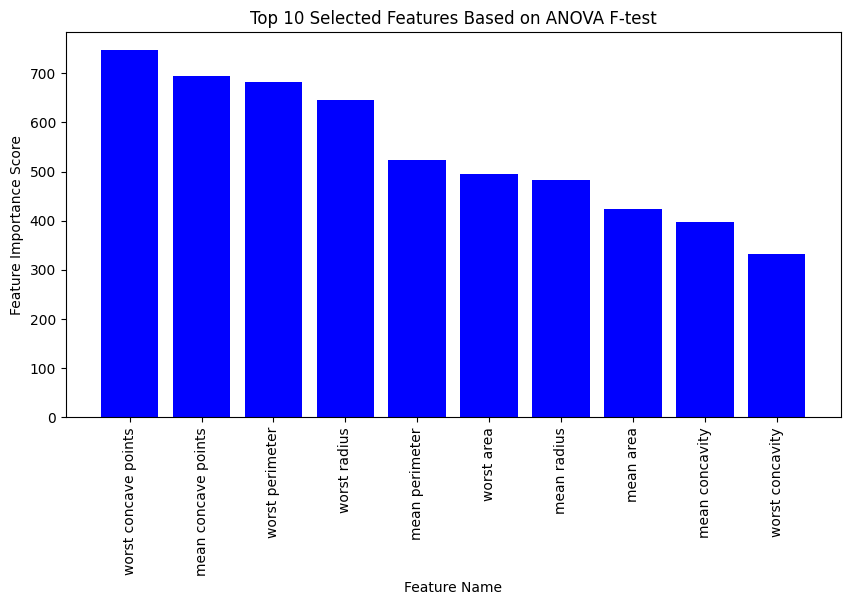

In [27]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target  # Features and target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (KNN is distance-based, so scaling is important)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a KNN classifier before feature selection
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_before = knn.predict(X_test_scaled)
accuracy_before = accuracy_score(y_test, y_pred_before)

# Feature Selection using SelectKBest (ANOVA F-test)
k = 10  # Select the top 10 features
selector = SelectKBest(score_func=f_classif, k=k)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Train a KNN classifier after feature selection
knn.fit(X_train_selected, y_train)
y_pred_after = knn.predict(X_test_selected)
accuracy_after = accuracy_score(y_test, y_pred_after)

# Print results
print(f"KNN Accuracy Before Feature Selection: {accuracy_before:.4f}")
print(f"KNN Accuracy After Feature Selection: {accuracy_after:.4f}")

# Visualizing the importance of features
feature_scores = selector.scores_
feature_indices = np.argsort(feature_scores)[::-1][:k]  # Get top k feature indices

plt.figure(figsize=(10, 5))
plt.bar(range(k), feature_scores[feature_indices], align="center", color="blue")
plt.xticks(range(k), [data.feature_names[i] for i in feature_indices], rotation=90)
plt.xlabel("Feature Name")
plt.ylabel("Feature Importance Score")
plt.title("Top 10 Selected Features Based on ANOVA F-test")
plt.show()

Q46 Train a PCA model and visualize the data reconstruction error after reducing dimensions

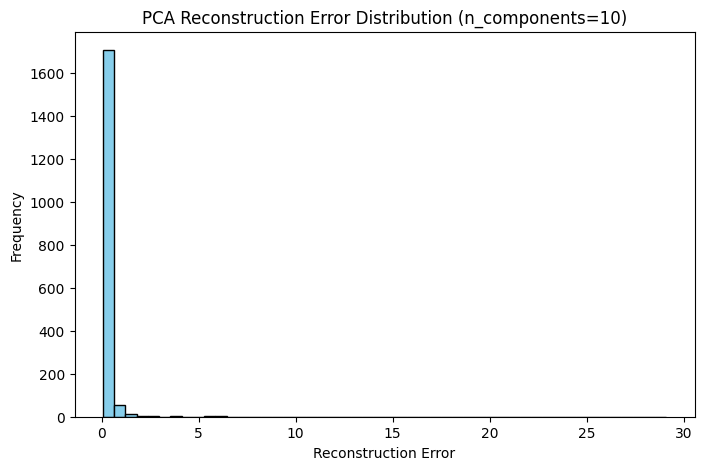

Average Reconstruction Error (MSE): 0.391985


In [28]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load the Digits dataset (each image is 8x8 pixels)
digits = load_digits()
X = digits.data  # Each sample has 64 features (flattened 8x8 images)

# Standardize the dataset (PCA is affected by scale)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA with reduced dimensions
n_components = 10  # Choose the number of principal components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Reconstruct data from reduced PCA components
X_reconstructed = pca.inverse_transform(X_pca)

# Compute reconstruction error (Mean Squared Error per sample)
reconstruction_error = np.mean((X_scaled - X_reconstructed) ** 2, axis=1)

# Plot the reconstruction error distribution
plt.figure(figsize=(8, 5))
plt.hist(reconstruction_error, bins=50, color='skyblue', edgecolor='black')
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.title(f"PCA Reconstruction Error Distribution (n_components={n_components})")
plt.show()

# Print average reconstruction error
print(f"Average Reconstruction Error (MSE): {np.mean(reconstruction_error):.6f}")


Q47 Train a KNN Classifier and visualize the decision boundary

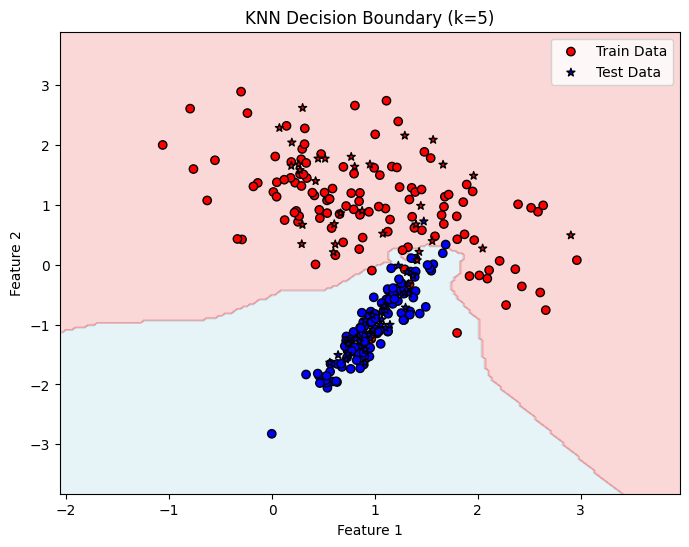

In [29]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

# Generate a synthetic dataset with 2 informative features for visualization
X, y = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=42)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train KNN Classifier
k = 5  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Create a mesh grid for plotting decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Predict labels for each point in the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(["lightblue", "lightcoral"]))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=ListedColormap(["blue", "red"]), edgecolors="k", label="Train Data")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=ListedColormap(["blue", "red"]), edgecolors="k", marker="*", label="Test Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"KNN Decision Boundary (k={k})")
plt.legend()
plt.show()


Q48 Train a PCA model and analyze the effect of different numbers of components on data variance

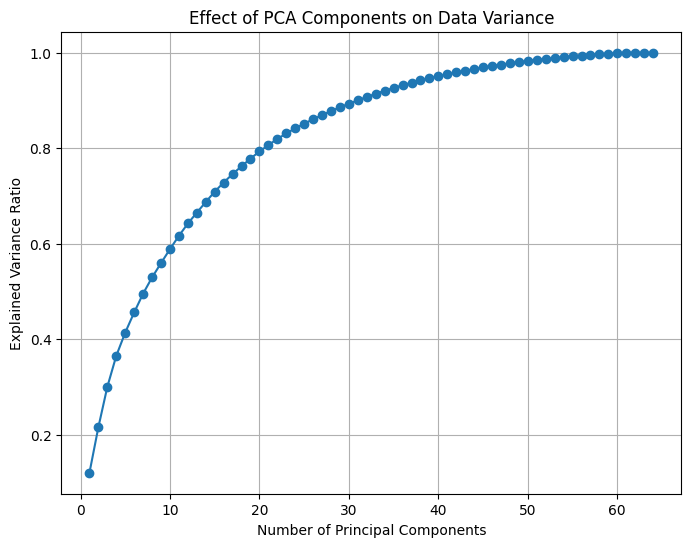

In [30]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

# Load dataset (Digits dataset: 64 features representing 8x8 images)
digits = load_digits()
X = digits.data

# Standardize the dataset (PCA is sensitive to feature scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA with varying numbers of components
n_components = range(1, X.shape[1] + 1)  # From 1 to max features
explained_variance_ratios = []

for n in n_components:
    pca = PCA(n_components=n)
    pca.fit(X_scaled)
    explained_variance_ratios.append(np.sum(pca.explained_variance_ratio_))

# Plot explained variance vs. number of components
plt.figure(figsize=(8, 6))
plt.plot(n_components, explained_variance_ratios, marker='o', linestyle='-')
plt.xlabel("Number of Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Effect of PCA Components on Data Variance")
plt.grid()
plt.show()
